# Capable of predicting the top finishers(eg. top 5 or Top 10) in formula 1 race with high

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Capstone Project /Experiments lab/Clean_final_data_00.csv')

In [ ]:
df.head(10)

,Unnamed: 0,Car,Date,Driver,Grand_Prix,PTS,Race_Position,Year,Year_PTS,Stops,No_lap,Lap_time,Total
0,0,Brabham Alfa Romeo,29 Apr 1979,Nelson Piquet,Spain,0.0,0,1979,3.0,1,8,21,23.402
1,1,Brabham Alfa Romeo,29 Apr 1979,Nelson Piquet,Spain,0.0,0,1979,3.0,2,8,46,47.151
2,2,Brabham Alfa Romeo,27 May 1979,Nelson Piquet,Monaco,0.0,0,1979,3.0,1,6,46,31.593
3,3,Brabham Alfa Romeo,01 Jul 1979,Nelson Piquet,France,0.0,0,1979,3.0,1,6,25,25.269
4,4,Brabham Alfa Romeo,01 Jul 1979,Nelson Piquet,France,0.0,0,1979,3.0,2,6,50,48.809
5,5,Brabham Alfa Romeo,14 Jul 1979,Nelson Piquet,Great Britain,0.0,0,1979,3.0,1,6,22,27.714
6,6,Brabham Alfa Romeo,14 Jul 1979,Nelson Piquet,Great Britain,0.0,0,1979,3.0,1,8,29,26.077
7,7,Brabham Alfa Romeo,29 Jul 1979,Nelson Piquet,Germany,0.0,0,1979,3.0,1,6,35,28.375
8,8,Brabham Alfa Romeo,29 Jul 1979,Nelson Piquet,Germany,0.0,0,1979,3.0,1,8,26,25.428
9,9,Brabham Alfa Romeo,29 Jul 1979,Nelson Piquet,Germany,0.0,0,1979,3.0,2,8,47,47.968


# Insight of data (EDA)

In [ ]:
df['Car'].value_counts().head(20)

Car
Ferrari                    19606
McLaren Mercedes           11949
Mercedes                    9777
Renault                     8777
Force India Mercedes        4435
Williams Mercedes           4007
Sauber Petronas             3756
Red Bull Racing Renault     3755
Toyota                      3611
BAR Honda                   3061
Williams BMW                3042
Honda                       2854
McLaren Honda               2845
Sauber Ferrari              2794
Haas Ferrari                2504
Williams Renault            2196
Williams Cosworth           2042
STR Ferrari                 2001
Sauber BMW                  1914
Benetton Renault            1859
Name: count, dtype: int64

In Review Ferrari is on top followed by McLaren Mercedes , Mercedes


# Top 10 cars visualization report


Text(0.5, 0, 'Number of GP wins')

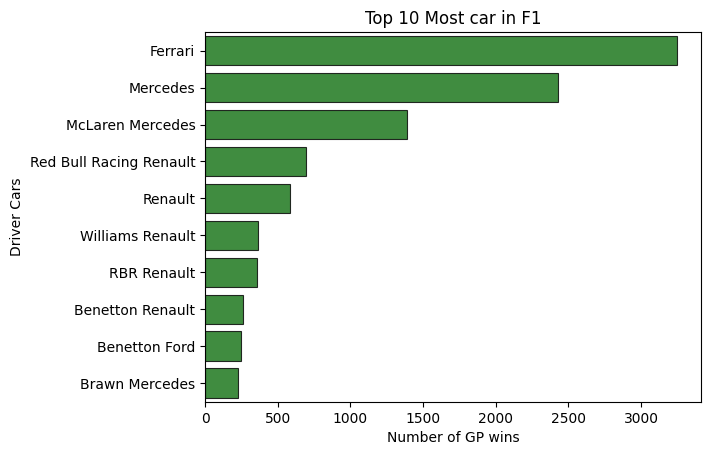

In [ ]:
 driver_winner=df.loc[df['Race_Position']==1].groupby('Car')['Race_Position'].count().sort_values(ascending=False).to_frame().reset_index()
 top10drivers=driver_winner.head(10)
 sns.barplot(data=top10drivers,y='Car',x='Race_Position',color='green',alpha=0.8,linewidth=.8,edgecolor='black')
 plt.title('Top 10 Most car in F1')
 plt.ylabel('Driver Cars')
 plt.xlabel('Number of GP wins')

**With more over 3,000 Grand Prix points, Ferrari leads the field.With less GP racing positions, Mercedes and McLaren Mercedes come next.**

In [ ]:
df['Driver'].value_counts().head(10)

Driver
Fernando Alonso       9637
Rubens Barrichello    8389
Jenson Button         8152
Michael Schumacher    7551
Lewis Hamilton        7296
Felipe Massa          6961
Sebastian Vettel      6690
Jarno Trulli          5180
David Coulthard       4927
Mark Webber           4123
Name: count, dtype: int64

Text(0.5, 0, 'Number of GP wins')

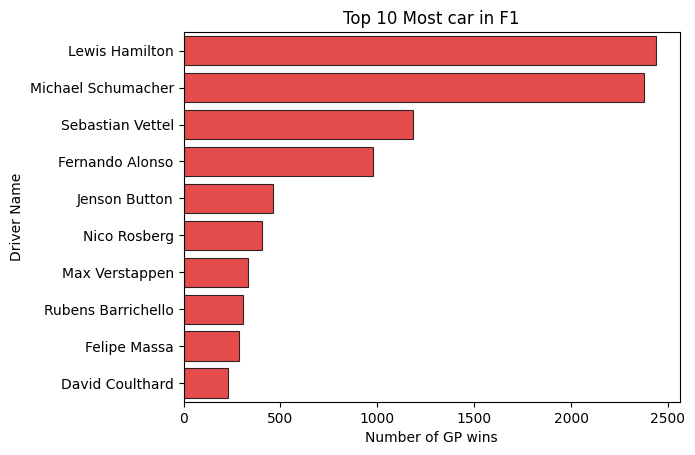

In [ ]:
 driver_winner=df.loc[df['Race_Position']==1].groupby('Driver')['Race_Position'].count().sort_values(ascending=False).to_frame()
 top10drivers=driver_winner.head(10)
 sns.barplot(data=top10drivers,y='Driver',x='Race_Position',color='red',alpha=0.8,linewidth=.8,edgecolor='black')
 plt.title('Top 10 Most car in F1')
 plt.ylabel('Driver Name')
 plt.xlabel('Number of GP wins')

In [ ]:
df['Grand_Prix'].value_counts().head(10)

Grand_Prix
Spain            10700
Hungary          10662
Brazil            9395
Great Britain     9313
Japan             8699
Belgium           7548
Australia         6957
Canada            6957
Germany           6421
Italy             6285
Name: count, dtype: int64

Text(0.5, 0, 'Countries')

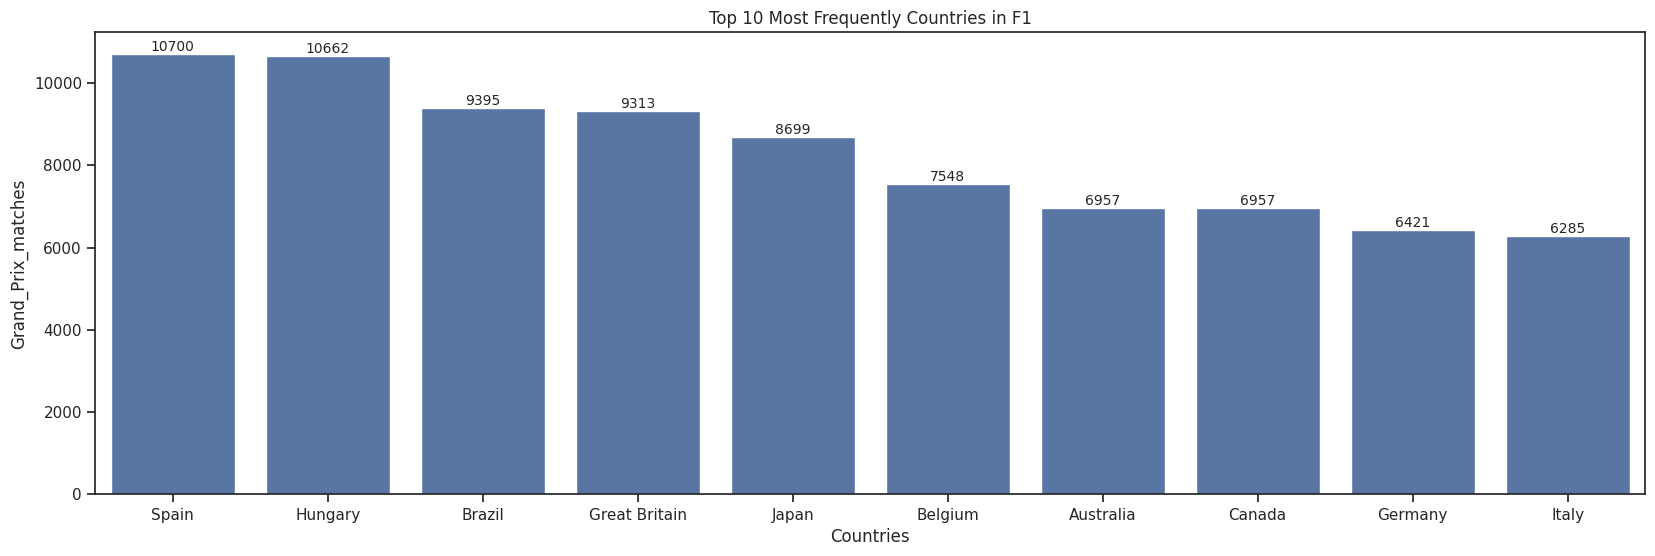

In [ ]:
top_10_circuits=df['Grand_Prix'].value_counts().head(10)
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=top_10_circuits.index, y=top_10_circuits.values, estimator="sum", errorbar=None,)
sns.set(style='ticks')
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title("Top 10 Most Frequently Countries in F1")
plt.ylabel('Grand_Prix_matches')
plt.xlabel('Countries')

Text(0.5, 0, 'countries')

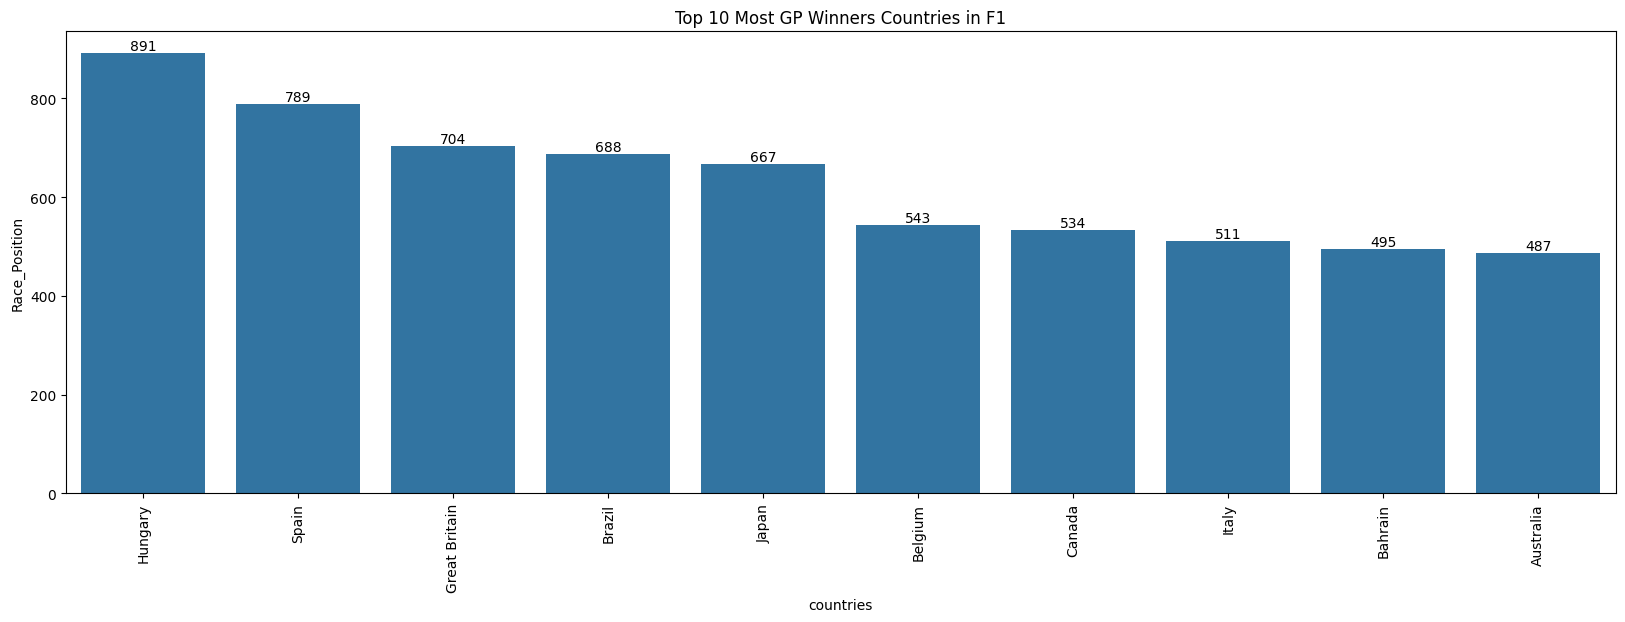

In [ ]:
driver_winner = df.loc[df['Race_Position']==1].groupby('Grand_Prix')['Race_Position'].count().sort_values(ascending=False).to_frame().reset_index().head(10)
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
ax=sns.barplot(data=driver_winner,x='Grand_Prix',y='Race_Position')
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Top 10 Most GP Winners Countries in F1')
plt.xlabel('countries')

Text(0, 0.5, 'Stops')

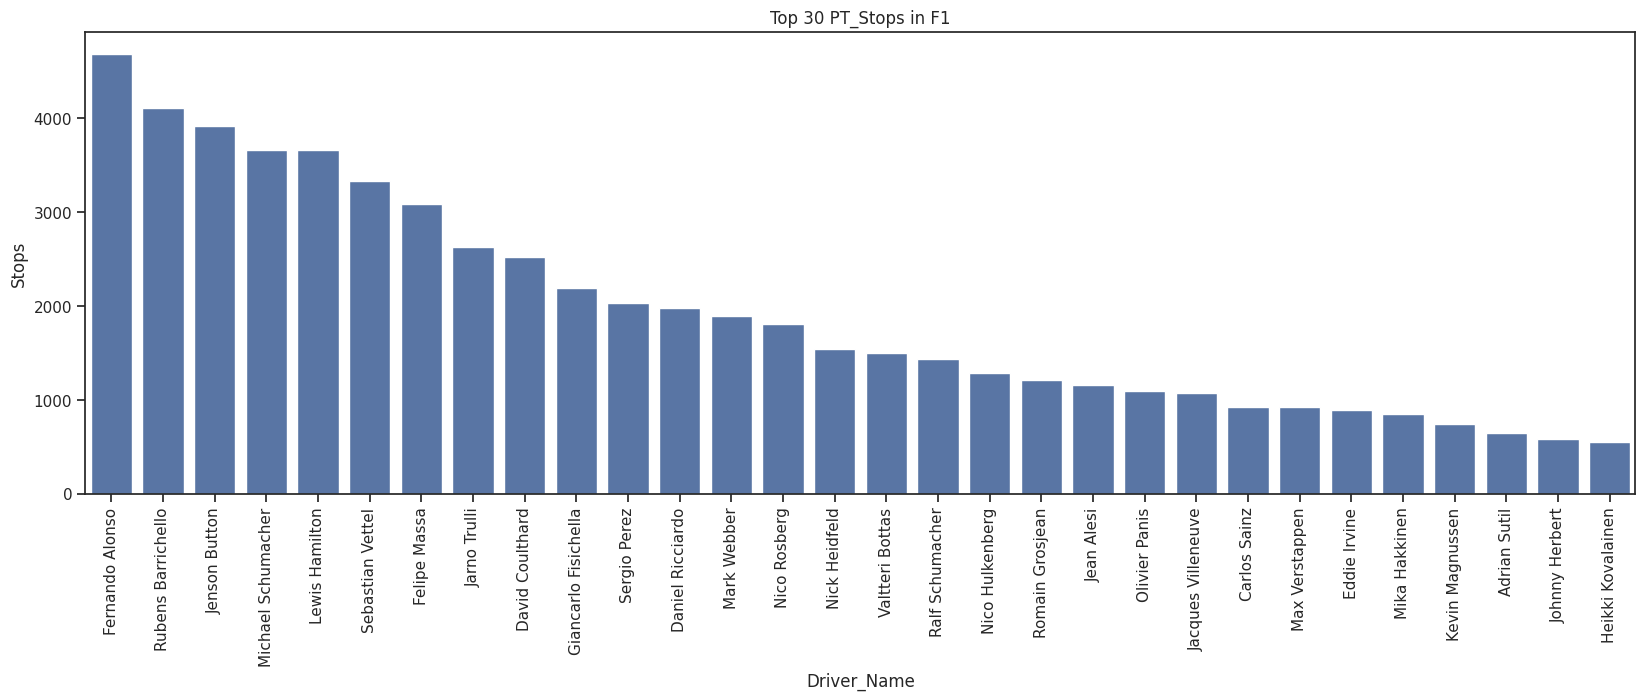

In [ ]:
driver_winner = df.loc[df['Stops']==1].groupby('Driver')['Stops'].count().sort_values(ascending=False).to_frame().reset_index().head(30)
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
sns.barplot(data=driver_winner,x='Driver',y='Stops')
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Top 30 PT_Stops in F1')
plt.xlabel('Driver_Name')
plt.ylabel('Stops')
